In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")   # example: zomato.csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Check first few rows
df[['Restaurant Name', 'Price range', 'Has Online delivery', 'Has Table booking']].head()

# Check unique values
print(df['Price range'].unique())
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())


[3 4 2 1]
['No' 'Yes']
['Yes' 'No']


In [3]:
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes':1, 'No':0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes':1, 'No':0})


Online Delivery Probability by Price Range:
 Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Has Online delivery, dtype: float64


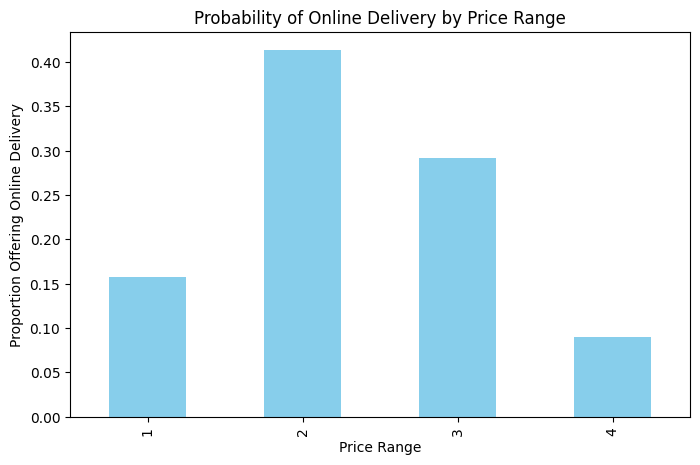

In [4]:
online_delivery_analysis = df.groupby('Price range')['Has Online delivery'].mean()
print("Online Delivery Probability by Price Range:\n", online_delivery_analysis)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
online_delivery_analysis.plot(kind='bar', color='skyblue')
plt.title('Probability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Online Delivery')
plt.show()


Table Booking Probability by Price Range:
 Price range
1    0.000225
2    0.076775
3    0.457386
4    0.467577
Name: Has Table booking, dtype: float64


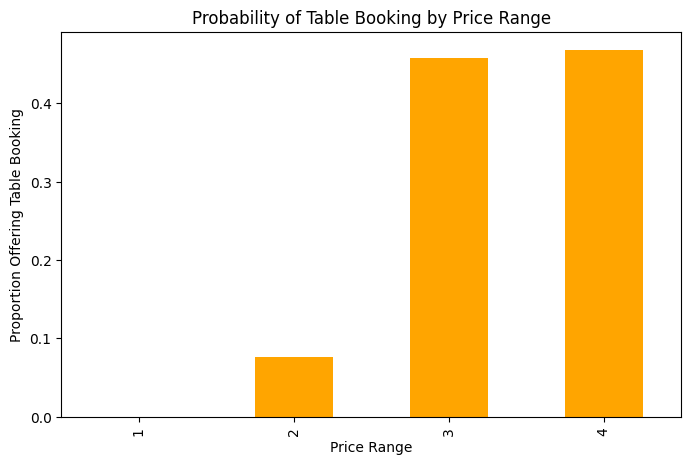

In [5]:
table_booking_analysis = df.groupby('Price range')['Has Table booking'].mean()
print("Table Booking Probability by Price Range:\n", table_booking_analysis)

# Visualization
plt.figure(figsize=(8,5))
table_booking_analysis.plot(kind='bar', color='orange')
plt.title('Probability of Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Table Booking')
plt.show()


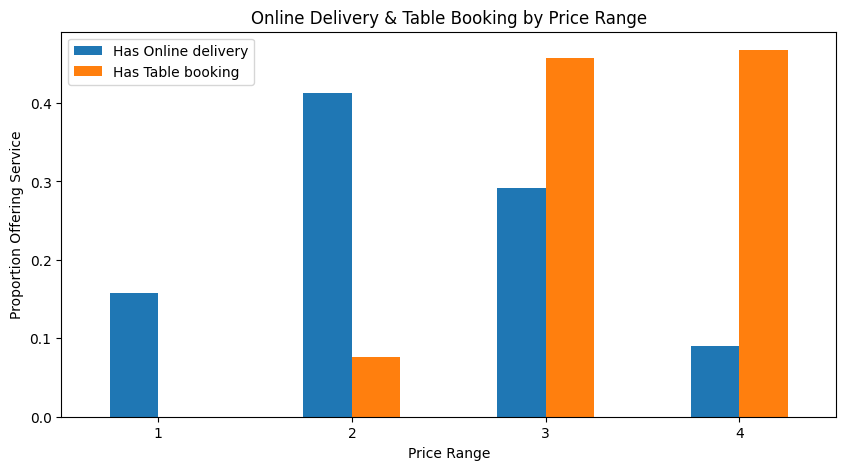

In [6]:
combined = df.groupby('Price range')[['Has Online delivery','Has Table booking']].mean()
combined.plot(kind='bar', figsize=(10,5))
plt.title('Online Delivery & Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion Offering Service')
plt.xticks(rotation=0)
plt.show()


In [7]:
print("Correlation with Online Delivery:", df['Price range'].corr(df['Has Online delivery']))
print("Correlation with Table Booking:", df['Price range'].corr(df['Has Table booking']))


Correlation with Online Delivery: 0.07791776880448596
Correlation with Table Booking: 0.5019247250371413


1.Higher-priced restaurants often offer more services like online delivery and table booking.

2.Lower-priced restaurants may have limited services.

3.Bar charts show trends clearly, and combined analysis highlights both services across price ranges.